0.010687200003303587
0.0022635999775957316
0.004166600003372878
0.00038520002271980047
0.06699539997498505
0.011149700003443286
0.044229799997992814


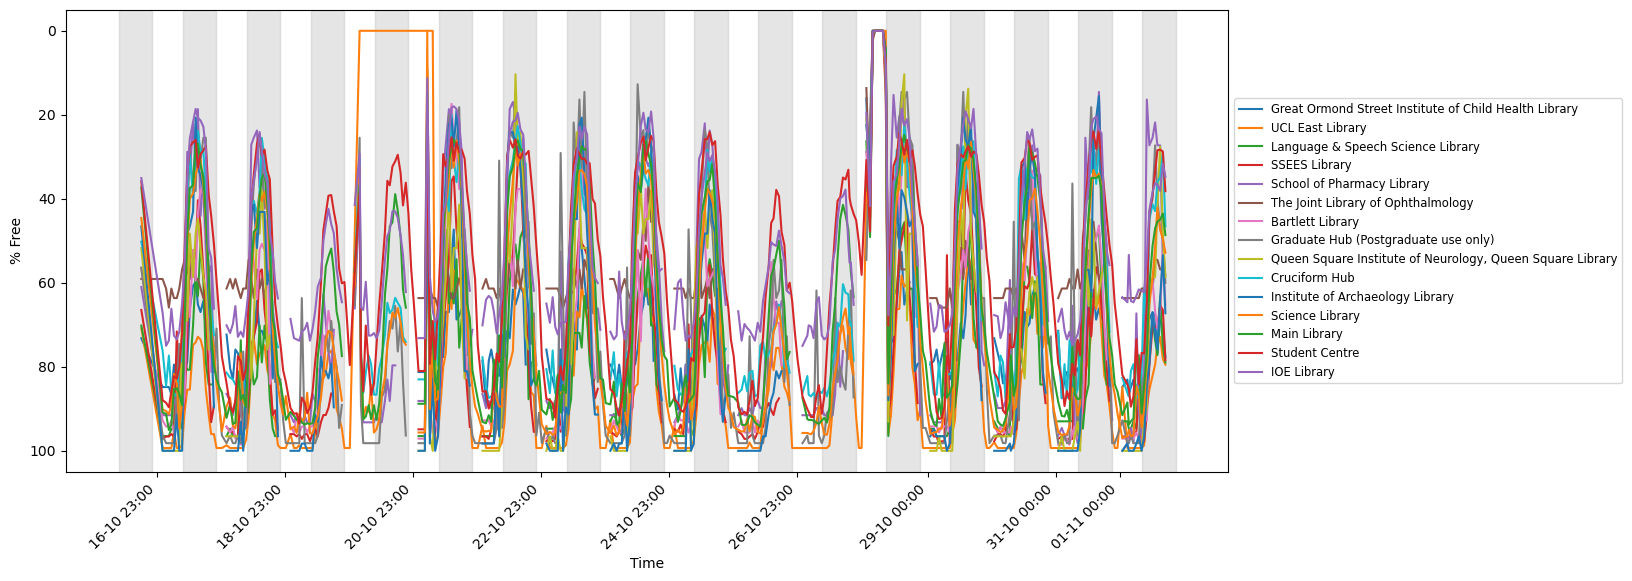

In [57]:
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
import pandas as pd
import numpy as np
import time
t1=time.perf_counter()
df=pd.read_csv('data/results.csv')
print((t2:=time.perf_counter())-t1)
df['DateTime']=df['Date']+' '+df['Time']
print((t3:=time.perf_counter())-t2)
df['DateTime']=pd.to_datetime(df['DateTime'],format='%Y-%m-%d %H:%M:%S.%f',utc=True)
print((t4:=time.perf_counter())-t3)
df['DateTime']=df['DateTime'].dt.tz_convert('Europe/London')
print((t5:=time.perf_counter())-t4)
fig, ax = plt.subplots(figsize=(15, 6))
df.loc[df['% Free']==-1, '% Free'] = np.nan
for lib in df['Library'].unique():
    plt.plot('DateTime', '% Free', data=df[df['Library']==lib], label=lib)
ax.xaxis.set_major_formatter(DateFormatter('%d-%m %H:%M'))
print((t6:=time.perf_counter())-t5)
plt.xlabel('Time')
plt.ylabel('% Free')
plt.xticks(rotation=45, ha='right')
plt.legend()
print((t7:=time.perf_counter())-t6)
for date in df['DateTime'].dt.date.unique():
    start_time = pd.to_datetime(f"{date} 08:30:00")
    end_time = pd.to_datetime(f"{date} 21:00:00")
    plt.axvspan(start_time, end_time, color='darkgray', alpha=0.3)  
print((t8:=time.perf_counter())-t7)
ax.invert_yaxis()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

In [5]:
pd.to_datetime('2024-10-27').date()==pd.to_datetime('2024-10-27 17:58:09.293787+01:00').date()

True